<a href="https://colab.research.google.com/github/HeribertoGodoy/Tareas-EIE-401-/blob/main/Actividades/Actividad%202/Actividad_2_GodoyHeriberto_203197551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Heriberto Godoy</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

In [1]:
# Para leer el archivo CVS se ocupa esta libreria
import pandas as pd

# df sera nuestro objeto donde almacenaremos los datos del archivo
df = pd.read_csv("/content/AbsorbanceTE_0-0.csv")
df

,Freq [GHz],AbsorbanceTE []
0,30.0,0.008415
1,30.1,0.009260
2,30.2,0.010222
3,30.3,0.011319
4,30.4,0.012576
...,...,...
596,89.6,0.054279
597,89.7,0.003677
598,89.8,0.002508
599,89.9,0.002696


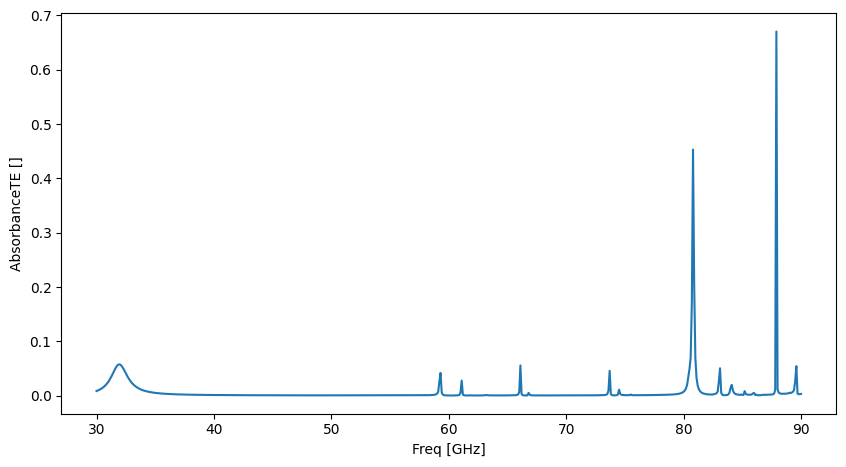

In [2]:
# Grafica del archivo CSV

import matplotlib.pyplot as plt
# Esta función grafica una serie de datos.
def _plot_series(series, series_name, series_index=0):

    xs = series['Freq [GHz]']
    ys = series['AbsorbanceTE []']

    #Grafica los valores xs (frecuencia en GHz) en el eje x y los valores ys (absorbancia) en el eje y
    plt.plot(xs, ys, label=series_name)

fig, ax = plt.subplots(figsize=(10, 5.2))
# Aquí necesitas definimos df con las columnas 'Freq [GHz]' y 'AbsorbanceTE []'
df_sorted = df.sort_values('Freq [GHz]', ascending=True)
_plot_series(df_sorted, '')
plt.xlabel('Freq [GHz]')
plt.ylabel('AbsorbanceTE []')
plt.show()

In [3]:
# Para descomprimir archivo txt
import gzip

# Especifica la ruta del archivo comprimido .gz
archivo_comprimido = '/content/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz'

# Especifica la ruta donde deseas guardar el archivo descomprimido
archivo_descomprimido = '/content/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt'

with gzip.open(archivo_comprimido, 'rb') as f_in:
    with open(archivo_descomprimido, 'wb') as f_out:
        # Copiar el contenido del archivo comprimido al archivo descomprimido
        f_out.write(f_in.read())

# Ahora que el archivo ha sido descomprimido y creado, podemos imprimir su contenido
# se veran todos los datos que contiene el archivo txt
with open(archivo_descomprimido, 'r') as f:
    for line in f:
        print(line.strip())

Se truncaron las últimas líneas 5000 del resultado de transmisión.
-3.8457447661853787e-20
-4.3486599575591194e-20
-4.2626414443878205e-20
-4.2480330432672744e-20
-4.7116584653837181e-20
-4.4352343036784793e-20
-4.6590892026362587e-20
-4.2342080708657362e-20
-4.7567509796153725e-20
-3.9025833251511291e-20
-3.8268938607884640e-20
-3.7731677326954745e-20
-3.3716488929556541e-20
-3.6686400255146229e-20
-3.3851572234368557e-20
-2.9784155087643817e-20
-3.7458940861045475e-20
-4.0548582317812924e-20
-2.9362857546337792e-20
-4.0817815095446425e-20
-3.3142841558723850e-20
-3.3798056610765488e-20
-5.2268441950856268e-20
-3.2766607529267297e-20
-3.8358481594702413e-20
-3.7540310289394456e-20
-3.4329232644858925e-20
-3.9247022738174903e-20
-4.0076322750881498e-20
-3.4000929179820456e-20
-3.2282399223112553e-20
-4.5269975705829691e-20
-2.8000067579572245e-20
-3.5643767282792482e-20
-3.0906209805052835e-20
-3.4789501742187860e-20
-4.0010063082281846e-20
-2.1959921617169176e-20
-4.4935492214471305e-

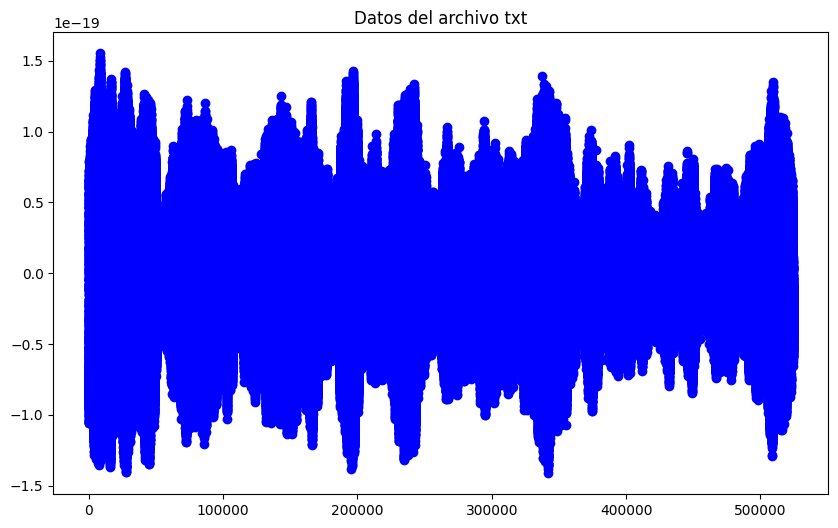

In [4]:
# Esta parte igual puede ir en el codigo de arriba, pero al mostrar todos los datos del
# archivo, se tarda unos momentos, en cambio por separado es mas rapido
# Aqui se mostrara la grafica del archivo txt
import matplotlib.pyplot as plt

# Ruta del archivo descomprimido
archivo_descomprimido = '/content/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt'

# Listas para almacenar los datos y contar las líneas
datos = []
contador_lineas = 0

# Abrir el archivo, leer los datos y contar las líneas
with open(archivo_descomprimido, 'r') as archivo:
    for linea in archivo:
        if not linea.startswith('#'):  # Ignorar líneas que comienzan con '#'
            datos.append(float(linea.strip()))  # Asumiendo que los datos son números (convertirlos a flotantes)
            contador_lineas += 1

# Crear una lista de números de línea
numeros_lineas = list(range(1, contador_lineas + 1))

# Graficar los datos versus el número de líneas
plt.figure(figsize=(10, 6))
plt.scatter(numeros_lineas, datos, marker='o', color='blue', alpha=1)

plt.title('Datos del archivo txt')
plt.show()


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


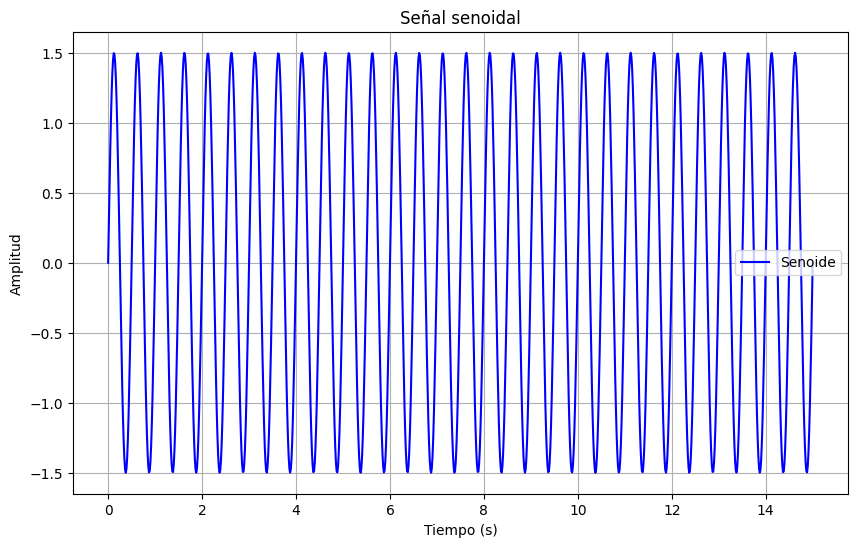

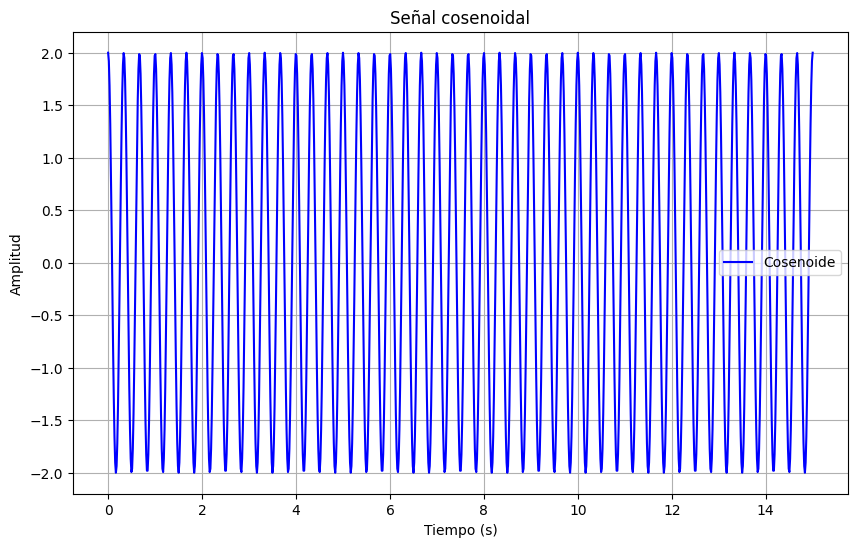

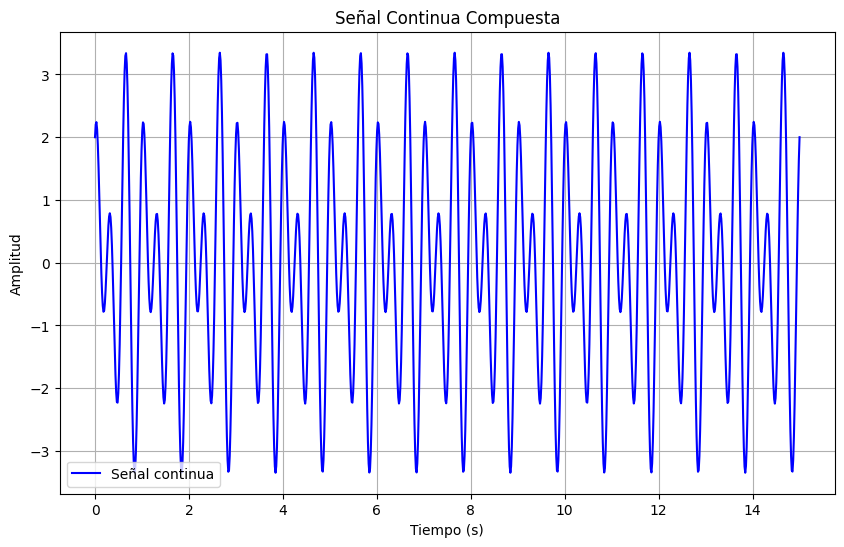

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
t = np.linspace(0, 15, 1000)  # Tiempo de 0 a 15 segundos
f1 = 2  # Frecuencia de la senoide (en Hz)
f2 = 3  # Frecuencia de la cosenoide (en Hz)
A1 = 1.5 # Frecuencia senoide
A2 = 2  # Amplitud de la cosenoide

# Definición de las funciones
senoide = A1 * np.sin(2 * np.pi * f1 * t)  # Corregido para incluir la amplitud A1
cosenoide = A2 * np.cos(2 * np.pi * f2 * t)

# Grafica senoide
plt.figure(figsize=(10, 6))
plt.plot(t, senoide, label=r'Senoide', color='blue')
plt.title('Señal senoidal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Grafica Cosenoide
plt.figure(figsize=(10, 6))
plt.plot(t, cosenoide, label=r'Cosenoide', color='blue')
plt.title('Señal cosenoidal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la señal continua
senal_continua = senoide + cosenoide

plt.figure(figsize=(10, 6))  # Corregido para definir el tamaño de la figura
plt.plot(t, senal_continua, label=r'Señal continua', color='blue')
plt.title('Señal Continua Compuesta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()



* La senoide estará definida con una frecuencia \( f \) de 2 Hz y amplitud \( A \) de 1.5.

$$ x_1(t) = A \cdot \sin(2\pi f t) $$


* La cosenoide estará definida con una frecuencia \( f \) de 3 Hz y amplitud \( A \) de 2. :

$$ x_2(t) = A \cdot \cos(2\pi f t) $$

* Por lo tanto, la señal continua estara dada por:
$$ SeñalContinua = x_1 + x_2 $$

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

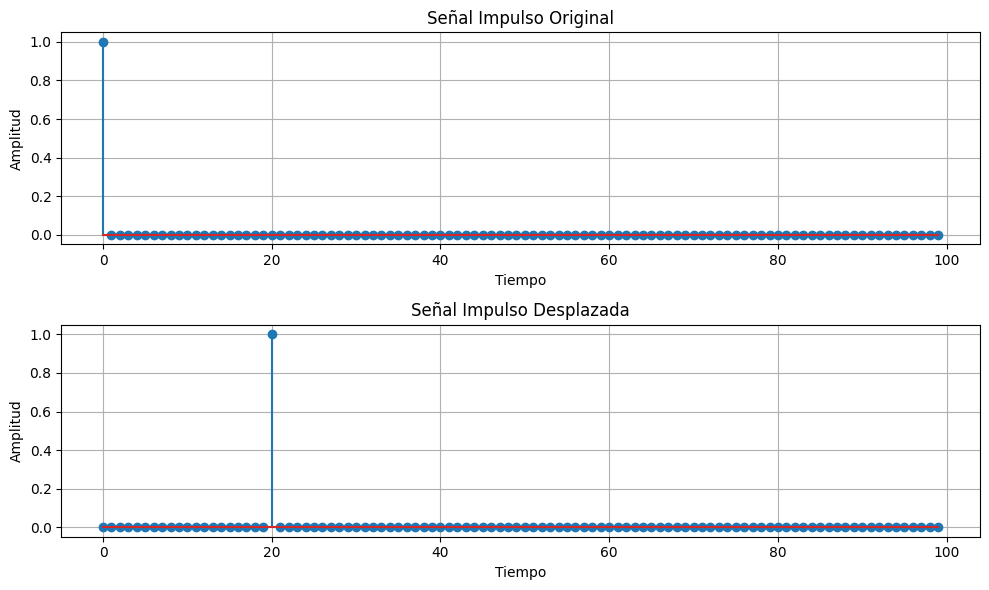

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la longitud de la señal
longitud_señal = 100

# Crear una señal impulso en el tiempo t = 0
señal_impulso = np.zeros(longitud_señal)
señal_impulso[0] = 1

# Desplazar la señal impulso
cantidad_desplazamiento = 20  # Cantidad de muestras a desplazar
señal_impulso_desplazada = np.roll(señal_impulso, cantidad_desplazamiento)

# Graficar la señal impulso original
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(señal_impulso)
plt.title('Señal Impulso Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar la señal impulso desplazada
plt.subplot(2, 1, 2)
plt.stem(señal_impulso_desplazada)
plt.title('Señal Impulso Desplazada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

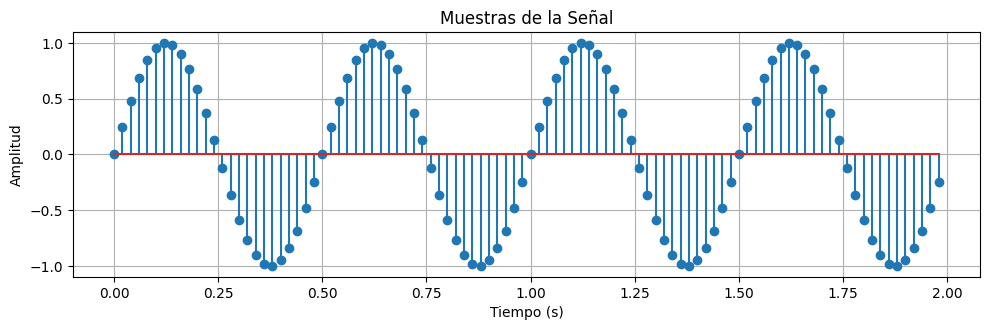

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal senoidal
frecuencia = 2  # Hz
amplitud = 1
fase = 0
duración = 2  # segundos
frecuencia_muestreo = 50  # Hz

# Crear un array de tiempo para la señal
tiempo = np.linspace(0, duración, int(duración * frecuencia_muestreo), endpoint=False)

# Generar la señal senoidal
señal_senoidal = amplitud * np.sin(2 * np.pi * frecuencia * tiempo + fase)

# Realizar la operación de sampleo (muestreo)
muestras_tiempo = np.arange(0, duración, 1/frecuencia_muestreo)
muestras_señal = amplitud * np.sin(2 * np.pi * frecuencia * muestras_tiempo + fase)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.stem(muestras_tiempo, muestras_señal,)
plt.title('Muestras de la Señal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

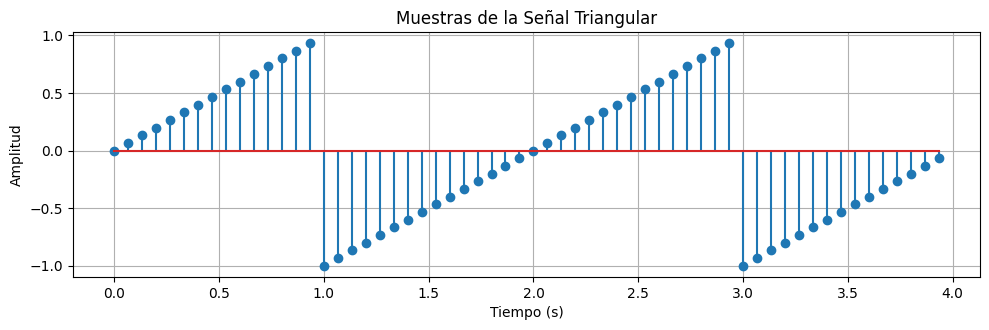

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal triangular
amplitud = 1
periodo = 2  # segundos
frecuencia = 1 / periodo  # Hz
duración = 2 * periodo  # segundos
frecuencia_muestreo = 15  # Hz

# Crear un array de tiempo para la señal
tiempo = np.linspace(0, duración, int(duración * frecuencia_muestreo), endpoint=False)

# Generar la señal triangular
señal_triangular = amplitud * (2 * np.abs((tiempo / periodo - 0.5) % 1) - 1)

# Realizar la operación de muestreo (sampleo)
muestras_tiempo = np.arange(0, duración, 1 / frecuencia_muestreo)
muestras_señal = amplitud * (2 * np.abs((muestras_tiempo / periodo - 0.5) % 1) - 1)

# Graficar la señal triangular y las muestras resultantes
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 2)
plt.stem(muestras_tiempo, muestras_señal)
plt.title('Muestras de la Señal Triangular')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()



### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

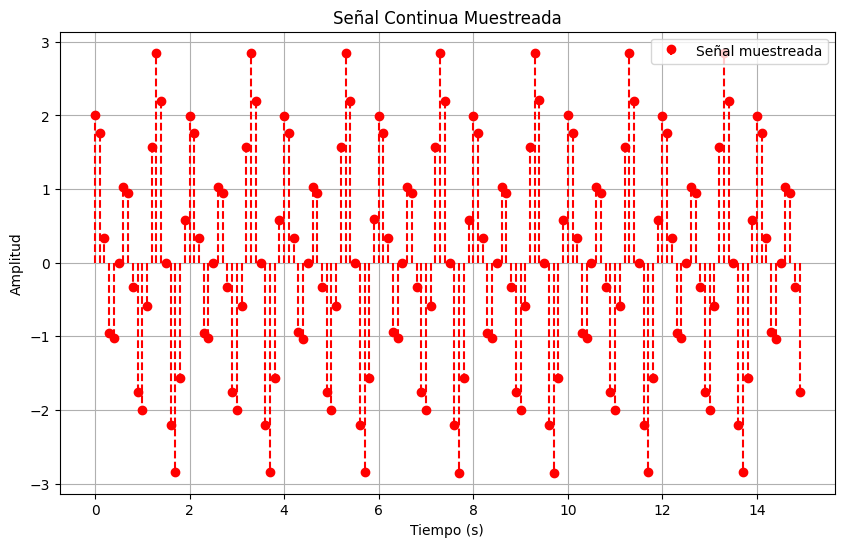

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
t = np.linspace(0, 15, 1000)  # Tiempo de 0 a 10 segundos
f1 = 2  # Frecuencia de la senoide (en Hz)
f2 = 3  # Frecuencia de la cosenoide (en Hz)
A1 = 1.5 # Frecuencia senoide
A2 = 2  # Amplitud de la cosenoide

# Definición de las funciones
senoide = np.sin(np.pi * f1 * t)
cosenoide = A2 * np.cos(np.pi * f2 * t)

# Graficar la señal continua
señal_continua = senoide + cosenoide #suma de las señales

# Definición de la frecuencia de muestreo
f_muestreo = 10  # Hz

# Obtener el paso de tiempo entre muestras
paso_tiempo_muestreo = 1 / f_muestreo

# Crear un nuevo arreglo de tiempo para las muestras
t_muestreo = np.arange(0, 15, paso_tiempo_muestreo)

# Muestrear la señal continua en los tiempos de muestreo
senal_muestreada = np.interp(t_muestreo, t, señal_continua)

# Graficar solo la señal muestreada
plt.figure(figsize=(10, 6))
plt.stem(t_muestreo, senal_muestreada, label='Señal muestreada', basefmt=" ", markerfmt='ro', linefmt='r--')
plt.title('Señal Continua Muestreada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

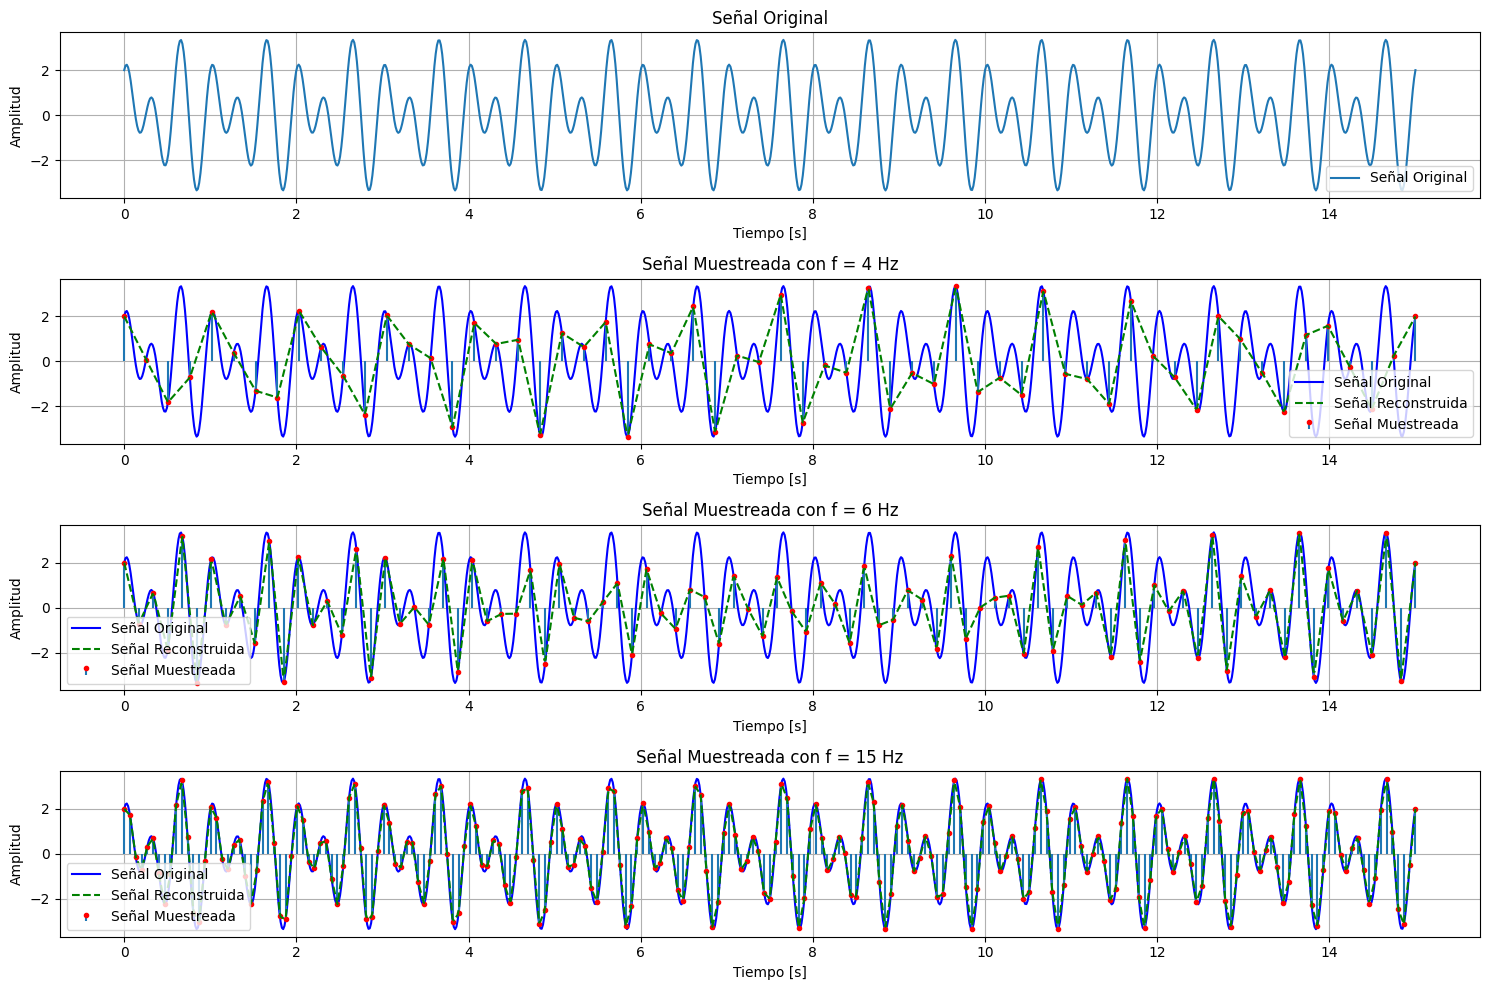

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
t = np.linspace(0, 15, 1000)  # Tiempo de 0 a 10 segundos
f1 = 2  # Frecuencia de la senoide (en Hz)
f2 = 3  # Frecuencia de la cosenoide (en Hz)
A1 = 1.5  # Amplitud de la senoide
A2 = 2  # Amplitud de la cosenoide

# Definición de las funciones
senoide = A1 * np.sin(2 * np.pi * f1 * t)
cosenoide = A2 * np.cos(2 * np.pi * f2 * t)
señal_continua = senoide + cosenoide

# Cálculo de la frecuencia máxima
F_max = max(f1, f2)

# Frecuencias de muestreo a evaluar
f_muestreo = [F_max + 1, 2 * F_max, 5 * F_max]

# Graficar la señal original y las señales muestreadas
plt.figure(figsize=(15, 10))

# Graficar señal original
plt.subplot(4, 1, 1)
plt.plot(t, señal_continua, label='Señal Original')
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Iterar sobre las frecuencias de muestreo
for i, f in enumerate(f_muestreo):
    # Muestreo de la señal original
    t_muestreo = np.linspace(0, 15, int(15 * f))
    señal_muestreada = A1 * np.sin(2 * np.pi * f1 * t_muestreo) + A2 * np.cos(2 * np.pi * f2 * t_muestreo)

    # Reconstrucción de la señal muestreada
    señal_reconstruida = np.interp(t, t_muestreo, señal_muestreada)

    # Graficar señal muestreada y señal reconstruida
    plt.subplot(4, 1, i+2)
    plt.plot(t, señal_continua, label='Señal Original', color='blue')
    plt.stem(t_muestreo, señal_muestreada, label='Señal Muestreada', basefmt=" ", markerfmt='r.')
    plt.plot(t, señal_reconstruida, label='Señal Reconstruida', linestyle='--', color='green')
    plt.title(f'Señal Muestreada con f = {f} Hz')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


### 3.6 Explica tus hallazgos

* Estas gráficas ilustran cómo el cumplimiento del teorema de Nyquist asegura una reconstrucción fiel de la señal original a partir de las señales muestreadas. Cuando la frecuencia de muestreo es adecuada (al menos el doble de la frecuencia máxima de la señal), podemos reconstruir la señal original con precisión. Si la frecuencia de muestreo es demasiado baja, perdemos información importante de la señal original, y si es demasiado alta, podemos estar gastando recursos innecesarios de procesamiento.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py